# Practica 3

- Abel Alejandro Martinez Loredo
- Diego Pichardo Blancas

## Ejercicio 19

In [ ]:
#Importamos librerías
import numpy as np
import sympy as sp
import scipy.linalg as LA
import matplotlib.pyplot as plt

#Ejercicio 19________________________________

# __* 19 a) *__

#Generamos las filas de la matriz que nos dan
a_1 = np.array([0.16, 0.10])
a_2 = np.array([0.17, 0.11])
a_3 = np.array([2.02, 1.29])

#Generamos las filas del vector y
y_1 = np.array([0.26])
y_2 = np.array([0.28])
y_3 = np.array([3.31])

#Formamos a la matriz A
A = np.vstack((a_1,a_2,a_3))

#Formamos al vector y
v_y = np.vstack([y_1, y_2, y_3])

#Definimos al vector x
x1, x2 = sp.symbols('x1 x2') #Esto nos va a permitir que Pyhton reconozca a las entradas
v_x = np.array([[x1],
                [x2]])

# Definimos y resolvemos el problema de mínimos cuadrados
v_x, residuals, rank, s = np.linalg.lstsq(A, v_y, rcond=None)

# Obtenemos los valores de x1 y x2
# flatten() convierte coef a una lista de valores, de otra manera solo nos
#aparece x1 y x2
x1, x2 = v_x.flatten()

print("El valor de x1 es:", x1)
print("El valor de x2 es:", x2)


# __* 19 b) *__

#Basta simplemente con cambiarel vector v_y por el vecctor b
#Para esto renombraremos la variables x1 y x2 cono z1 y z2


#Generamos las filas del vecctor b
b_1 = np.array([0.27])
b_2 = np.array([0.25])
b_3 = np.array([3.33])

#Formamos al vector b
v_b = np.vstack([b_1, b_2, b_3])

#Definimos a un vector x diferente para que nos guarde el resultado
#Definimos al vector x
z1, z2 = sp.symbols('z1 z2') #Esto nos va a permitir que Pyhton reconozca a las entradas
v_z = np.array([[z1],
                [z2]])

v_z, residuals, rank, s = np.linalg.lstsq(A, v_b, rcond=None)
z1, z2 = v_z.flatten()

print("El valor de x1 con la perturbación es:", z1)
print("El valor de x2 con la perturbación es:", z2)


# __* 19 c) *__

# Observamos que hay una diferencia de valores importante y esto es debido a la
#Perturbación del vector b. El método de mínimos cuadrados busca minimizar el
#error entre los valores observados (el vector b o el vector y) y los valores
#estimados. Entonces en el momento en el que se introdujo la perturbación el
#modelo lineal se ajustará a los valores observados (en nuestro caso el vector b)
# y así minimizar los errores respecto a las nuevas observaciones.

El valor de x1 es: 0.9999999999999934
El valor de x2 es: 1.00000000000001
El valor de x1 con la perturbación es: 7.00888730892274
El valor de x2 con la perturbación es: -8.39566299324546


## Ejercicio 20

In [ ]:
np.random.seed(811)

In [ ]:
def Cholesky(A):
  n=len(A)
  L=np.zeros_like(A)

  for i in range(n):
    for j in range(i+1):
      if i==j:
        sum=0.0
        for k in range(j):
          sum+=L[j][k]*L[j][k]
        L[j][j]=np.sqrt(A[j][j]-sum)
      else:
        sum=0.0
        for k in range(j):
          sum+=L[i][k]*L[j][k]
        L[i][j]=(A[i][j]-sum)/L[j][j]

  return L
def SustDelante(L,b):
    x=np.zeros_like(b)
    n=L.shape[0]# cantidad de renglones de L
    for i in range(n):
        sum=0.0
        for j in range(i):
            sum+=L[i,j]*x[j]
        x[i]=(b[i]-sum)/L[i,i]

    return x


def SustAtras(U, y):
    x = np.zeros_like(y)
    n = U.shape[0]  # cantidad de renglones de U
    x[n-1] = y[n-1] / U[n-1, n-1]
    for i in range(n-2, -1, -1):
        sum = 0.0
        for j in range(i+1, n):
            sum += U[i, j] * x[j]
        x[i] = (y[i] - sum) / U[i, i]

    return x

def QR(A):
  Q=np.empty_like(A) ## matriz Q
  R=np.zeros([A.shape[1],A.shape[1]]) ## matriz cuadrada
  vi=np.zeros([A.shape[1]])

  for i in range(A.shape[1]):
    vi=A[:,i]
    for j in range(i):
      R[j,i]=np.dot(Q[:,j].T,vi)
      vi = vi - R[j,i]*Q[:,j]
      #vi = a2 - (q1T, a2)* q1
    R[i,i]=np.linalg.norm(vi,2)
    Q[:,i]=vi/R[i,i]

  return Q,R

def Householder(A):
  Q=np.eye(len(A))
  n=A.shape[1]

  for i in range(n):
    xi=np.zeros(len(A))
    xi[i:]=A[:,i][i:]
    norm_x=LA.norm(xi)
    ei=np.zeros(len(A))
    ei[i]=1.0
    ui=np.zeros(len(A))
    ui=xi+np.sign(A[i,i])*norm_x*ei
    vi=ui/LA.norm(ui)
    vi=vi.reshape(-1,1)

    H=np.eye(len(A))-2*vi@vi.T
    A=H@A
    Q=Q@H

  return Q,A

In [ ]:
# Parámetros del problema
m = 21  # Número de datos
n = 12  # Grado del polinomio
epsilon = 1e-10  # Perturbación

# Generar los datos (t_i, y_i)
t = np.linspace(0, 1, m)
X_verdadera = np.ones(n)  # Coeficientes verdaderos
A = np.vander(t, n, increasing=True)  # Matriz diseno
b_verdadera = A @ X_verdadera # Valores sin peturbacion
u = np.random.rand(m)  # Numeros aleatorios
b = b_verdadera + (2 * u - 1) * epsilon # Valores con peturbacion

In [ ]:
# Ecuaciones normales
AtA = A.T @ A
Atb = A.T @ b

# Factorización de Cholesky
L = Cholesky(AtA)

Lt = L.T
Q = np.linalg.solve(Lt, A.T).T
# Resolver Ly = Atb
ySol = SustDelante(L, Atb)
# Resolver L^T x = y_chol
Params = SustAtras(Lt, ySol)


In [ ]:
Q,R =  QR(A)

In [ ]:
xQR = LA.solve_triangular(R, Q.T @ b)

In [ ]:
error_cholesky = np.linalg.norm(Params - X_verdadera)
error_qr = np.linalg.norm(xQR - X_verdadera)

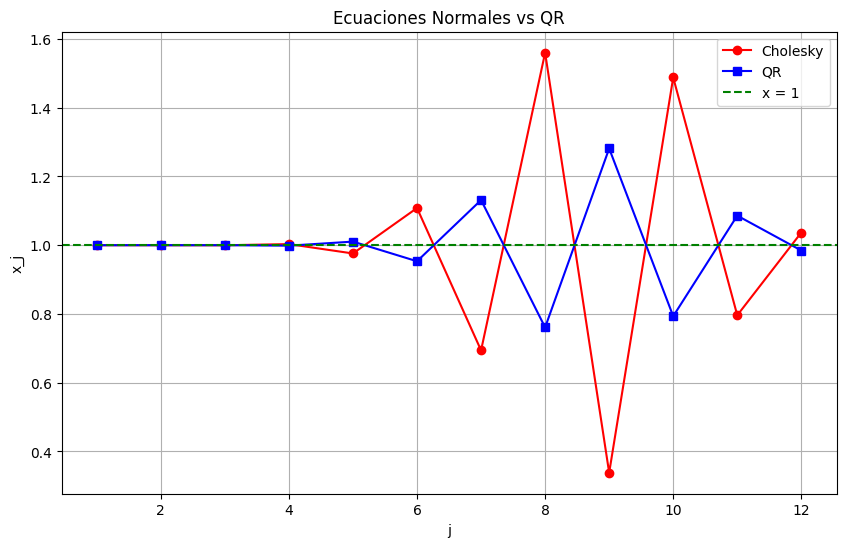

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, n + 1), Params, 'o-', label='Cholesky', color='red')
plt.plot(range(1, n + 1), xQR, 's-', label='QR', color='blue')
plt.axhline(1, color='green', linestyle='--', label='x = 1')
plt.xlabel('j')
plt.ylabel('x_j')
plt.title('Ecuaciones Normales vs QR')
plt.legend()
plt.grid(True)
plt.show()

### Preguntas

1. **Para cual de los metodos la solucion es mas sensible a la peturbacion **generada?
R: Para Cholesky, como se puede notar en la grafica

2. **Cual es los metodos esta mas proximo a tener la solucion exacta x = 1?**
R: El metodo de factorizacion QR

3. **La diferencia en las soluciones afecta el ajuste de puntos (ti,y i) por el polinomio, por que?**
R: Las ecuaciones normales tienden a amplificar mas el error por lo que el polinomio ajustado se desvia mas.

## Ejercicio 21

In [ ]:
# Generar matriz de Hilbert
def MatrizHilbert(n):
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i, j] = 1.0 / (i + j + 1)
    return H

def gs_clasico(A):
    n = A.shape[1]
    Q = np.zeros_like(A)
    for i in range(n):
        Q[:, i] = A[:, i]
        for j in range(i):
            Q[:, i] -= np.dot(Q[:, j], A[:, i]) * Q[:, j]
        Q[:, i] /= np.linalg.norm(Q[:, i])
    return Q

def gs_modificado(A):
    n = A.shape[1]
    Q = np.zeros_like(A)
    R = np.zeros((n, n))
    for i in range(n):
        v = A[:, i]
        for j in range(i):
            R[j, i] = np.dot(Q[:, j], v)
            v = v - R[j, i] * Q[:, j]
        R[i, i] = np.linalg.norm(v)
        Q[:, i] = v / R[i, i]
    return Q

def cholesky_normal(A):
  AtA = A.T @ A
  L = np.linalg.cholesky(AtA)
  Q = np.linalg.solve(L.T, A.T).T
  return Q


def medida_calidad(Q):
    I = np.eye(Q.shape[1])
    perdida = -np.log10(np.linalg.norm(I - Q.T @ Q, ord='fro'))
    return perdida

medidas_GS1 = []
medidas_GS2 = []
medidas_H = []
medidas_Chol = []
valores_matriz = range(2, 13)





for n in valores_matriz:
  H = MatrizHilbert(n)

  Q_GS1 = gs_clasico(H)
  GS1_medida = medida_calidad(Q_GS1)
  medidas_GS1.append(GS1_medida)

  Q_GS2 = gs_modificado(H)
  GS2_medida = medida_calidad(Q_GS2)
  medidas_GS2.append(GS2_medida)


  Q_H, _ = Householder(H)
  H_medida = medida_calidad(Q_H)
  medidas_H.append(H_medida)

  try:
    Q_Chol = cholesky_normal(H)
    chol_medida = medida_calidad(Q_Chol)
    medidas_Chol.append(chol_medida)
  except:
    print(f"Para {n} la matriz no es definida positiva")
    medidas_Chol.append(-15)






Para 8 la matriz no es definida positiva
Para 10 la matriz no es definida positiva
Para 11 la matriz no es definida positiva
Para 12 la matriz no es definida positiva


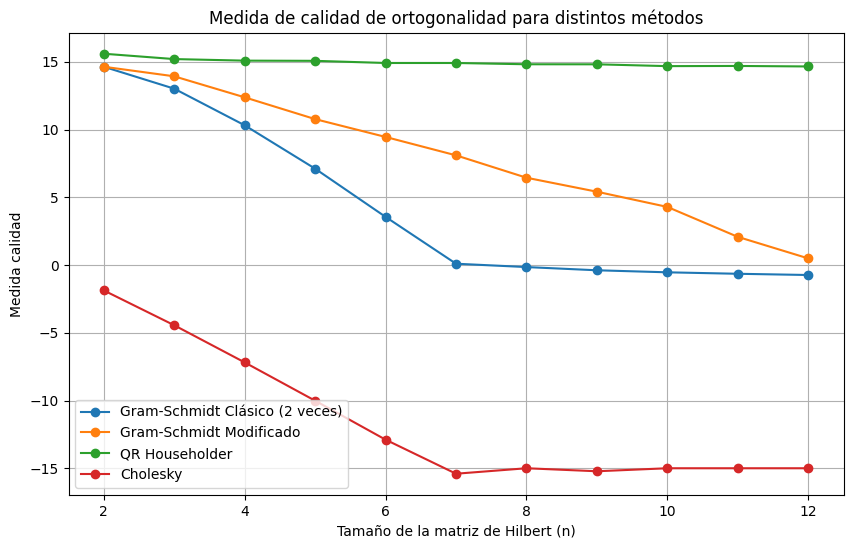

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(valores_matriz, medidas_GS1, label='Gram-Schmidt Clásico (2 veces)', marker='o')
plt.plot(valores_matriz, medidas_GS2, label='Gram-Schmidt Modificado', marker='o')
plt.plot(valores_matriz, medidas_H, label='QR Householder', marker='o')
plt.plot(valores_matriz, medidas_Chol, label='Cholesky', marker='o')
plt.xlabel('Tamaño de la matriz de Hilbert (n)')
plt.ylabel('Medida calidad')
plt.title('Medida de calidad de ortogonalidad para distintos métodos')
plt.legend()
plt.grid(True)
plt.show()

## Ejercicio 22

In [ ]:
import numpy as np

# Valores de epsilon a probar
eps_m = np.finfo(float).eps
valores_epsilon = [1e-4, np.sqrt(eps_m), eps_m]
b = np.array([1, 0, 0, 0])

# Ecuaciones Normales
def ecuaciones_normales(A, b):
    AtA = A.T @ A
    Atb = A.T @ b
    x = np.linalg.solve(AtA, Atb)
    return x

def qr_householder(A, b):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()

    for i in range(n):
        x = R[i:, i]
        e1 = np.zeros_like(x)
        e1[0] = np.linalg.norm(x)

        u = x - e1
        u = u / np.linalg.norm(u)

        H = np.eye(m)
        H[i:, i:] -= 2.0 * np.outer(u, u)

        Q = Q @ H
        R = H @ R

    Qb = Q.T @ b
    x = np.linalg.solve(R[:n, :], Qb[:n])
    return x
# Método de Factorización QR usando Givens
def qr_givens(A, b):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()

    for i in range(n):
        for j in range(i + 1, m):
            if R[j, i] != 0:
                r = np.hypot(R[i, i], R[j, i])
                c = R[i, i] / r
                s = -R[j, i] / r

                G = np.eye(m)
                G[[i, j], [i, j]] = c
                G[i, j] = s
                G[j, i] = -s

                R = G @ R
                Q = Q @ G.T

    Qb = Q.T @ b
    x = np.linalg.solve(R[:n, :], Qb[:n])
    return x
def qr_gs(A, b):
  Q, R = QR(A)
  x = np.linalg.solve(R, Q.T @ b)
  return x

def singular(a):
  return not (a.shape[0] == a.shape[1] and np.linalg.matrix_rank(a) == a.shape[0])



In [ ]:
# Mostrar resultados para diferentes valores de epsilon
print("Resultados para diferentes valores de epsilon:\n")
for epsilon in valores_epsilon:
    print(f"\nEpsilon = {epsilon:.2e}")

    # Matriz A para cada epsilon
    A = np.array([
        [1, 1, 1],
        [epsilon, 0, 0],
        [0, epsilon, 0],
        [0, 0, epsilon]
    ])

    try:
      # Solución con Método de Ecuaciones Normales
      x_normales = ecuaciones_normales(A, b)
      print(f"Solución Ecuaciones Normales: {x_normales}")

      # Solución con QR de Householder
      x_qr_householder = qr_householder(A, b)
      print(f"Solución QR Householder: {x_qr_householder}")

      # Solución con QR de Givens
      x_qr_givens = qr_givens(A, b)
      print(f"Solución QR Givens: {x_qr_givens}")

      # Solución con Gram-Schmidt Clásico
      x_gram_schmidt = qr_gs(A, b)
      print(f"Solución Gram-Schmidt: {x_gram_schmidt}")
    except:
      print("La matriz es singular para este valor de epsilon")

Resultados para diferentes valores de epsilon:


Epsilon = 1.00e-04
Solución Ecuaciones Normales: [0.33333333 0.33333333 0.33333333]
Solución QR Householder: [0.33333333 0.33333333 0.33333333]
Solución QR Givens: [0.33333333 0.33333333 0.33333333]
Solución Gram-Schmidt: [0.33333333 0.33333333 0.33333333]

Epsilon = 1.49e-08
Solución Ecuaciones Normales: [0.33333333 0.33333333 0.33333333]
Solución QR Householder: [1.00000000e+00 2.22044605e-16 2.22044605e-16]
Solución QR Givens: [0.33333333 0.33333333 0.33333333]
Solución Gram-Schmidt: [1. 0. 0.]

Epsilon = 2.22e-16
La matriz es singular para este valor de epsilon
